In [1]:
import theano
theano.config.exception_verbosity='high'

In [13]:
import converter
from model import SSDModel
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
%matplotlib inline
ROOT = '/home/nik-kochetov/work/'

In [3]:
model = SSDModel()

(37, 37, 24, 1)
(37, 37, 6, 1)
(18, 18, 24, 1)
(18, 18, 6, 1)
(7, 7, 24, 1)
(7, 7, 6, 1)
(5, 5, 24, 1)
(5, 5, 6, 1)
(3, 3, 24, 1)
(3, 3, 6, 1)
(1, 1, 24, 1)
(1, 1, 6, 1)


In [154]:
#path = os.path.join(ROOT, 'models_5', 'model.23-12-2017.ssd.04.hdf5')
path = os.path.join(ROOT, 'models_6', 'model.24-12-2017.b.ssd.03.hdf5')

model.model.load_weights(path)

In [39]:
imgs_path = os.path.join(ROOT, 'Barcodes', 'Images')
imgs = os.listdir(imgs_path)
print imgs[:10]

['Code_39_Check_0313_58.jpg', 'Code_39_0146_7.jpg', 'EAN_13_5sup_0083_4.jpg', 'Interleaved_2_of_5_(3)_0125_128.jpg', 'Code_39_0215_10.jpg', 'Code_39_0382_41.jpg', 'Code_128C_0311_31.jpg', 'Code_39_0198_11.jpg', 'Code_128A_0116_15.jpg', 'Code_39_Check_0173_56.jpg']


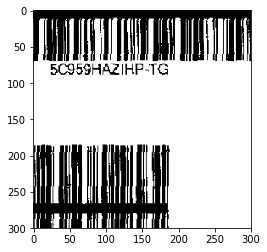

In [172]:
#img_name = '../../Images/long_0.jpg' 
#img_name = '../../Barcodes2d/Images/Aztec2_0051_0.jpg'
img_name = imgs[7]
cur_img_path = os.path.join(imgs_path, img_name)
img = np.asarray(Image.open(cur_img_path))
imshow(img)

In [173]:
img.shape

(300, 300, 3)

In [174]:
img_2 = image.load_img(cur_img_path, target_size=(300, 300))
img_2 = image.img_to_array(img)
img_2 = img_2.reshape([1] + list(img_2.shape))
img_2 = preprocess_input(img_2)

In [175]:
tensor = model.model.predict(img_2) #np.expand_dims(img, 0))

In [176]:
for val in tensor:
    print val.shape

(1, 37, 37, 24, 1)
(1, 18, 18, 24, 1)
(1, 7, 7, 24, 1)
(1, 5, 5, 24, 1)
(1, 3, 3, 24, 1)
(1, 1, 1, 24, 1)
(1, 37, 37, 6, 1)
(1, 18, 18, 6, 1)
(1, 7, 7, 6, 1)
(1, 5, 5, 6, 1)
(1, 3, 3, 6, 1)
(1, 1, 1, 6, 1)


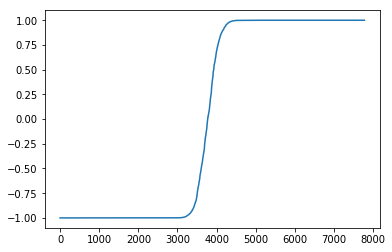

In [177]:
plt.plot(np.sort(tensor[1][np.nonzero(tensor[1])]))

In [182]:
reload(converter)
from converter import Converter

conv = Converter(os.path.join(ROOT, 'Barcodes', 'Rects'))
confs, rects = conv.restore_rects_batch(tensor, model, top=1)[0]
print confs
for rect in rects:
    rect.dump()

[[ 0.91985178]]
l=-0.045971861159,t=0.629791847198,r=0.434860750048,b=0.870208152802


l=-13.7915583477,t=188.937554159,r=130.458225014,b=261.062445841


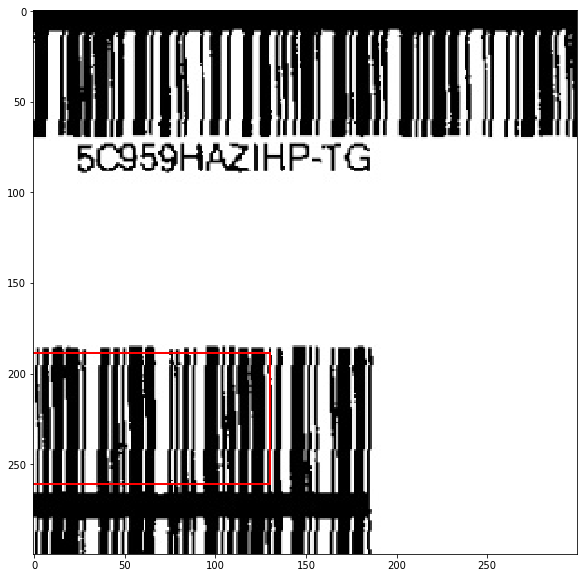

In [183]:
# Create figure and axes
fig,ax = plt.subplots(1, figsize=(12, 10))

# Display the image
ax.imshow(img)

#r = patches.Rectangle((50,50),100,100,linewidth=2,edgecolor='r',facecolor='none')
#ax.add_patch(r)


for rect in rects:
    # Create a Rectangle patch
    rr = rect.copy()
    rr.stretch(300, 300)
    rr.dump()
    r = patches.Rectangle((rr.left,rr.top),rr.width(),rr.height(),linewidth=2,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(r)

plt.show()